# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

--2023-03-10 11:31:54--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997750 (974K) [image/jpeg]
Saving to: '100zloty.jpg'

     0K .......... .......... .......... .......... ..........  5% 2,01M 0s
    50K .......... .......... .......... .......... .......... 10% 2,42M 0s
   100K .......... .......... .......... .......... .......... 15% 3,15M 0s
   150K .......... .......... .......... .......... .......... 20% 7,53M 0s
   200K .......... .......... .......... .......... .......... 25% 2,37M 0s
   250K .......... .......... .......... .......... .......... 30% 6,23M 0s
   300K .......... .......... .......... .......... .......... 35% 6,07M 0s
   350K ....

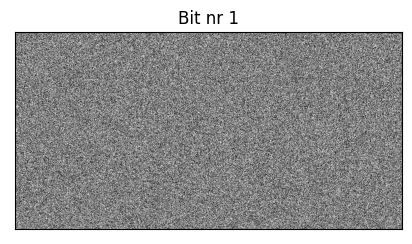

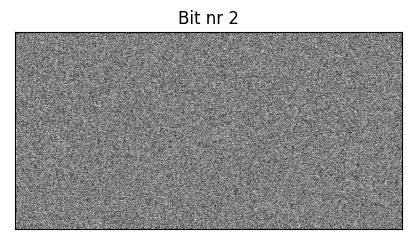

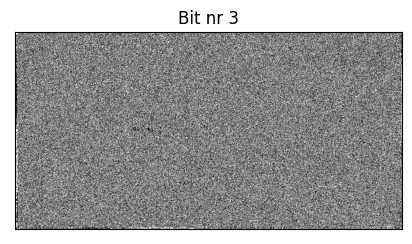

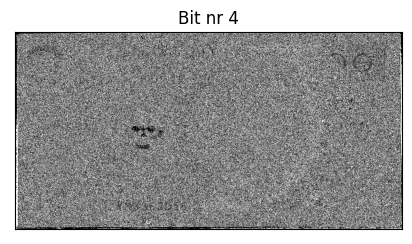

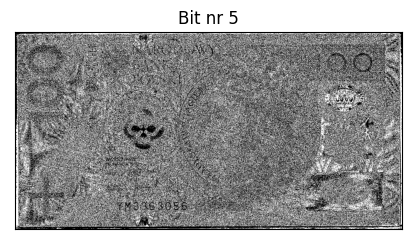

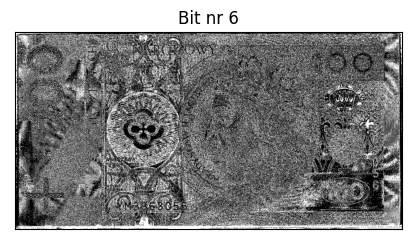

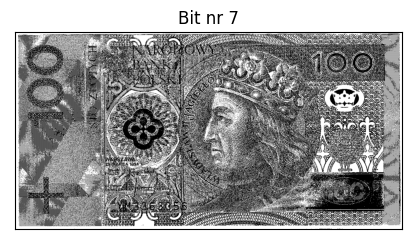

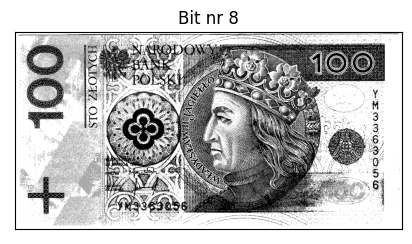

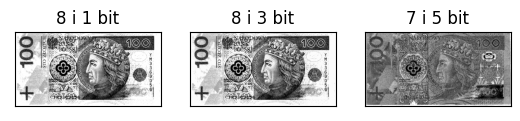

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

if not  os.path.exists('100zloty.jpg'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

image = cv2.imread('100zloty.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

images = []
tab = [2**i for i in range(0,8)]
for id,i in enumerate(tab):
    result = np.bitwise_and(gray,i)
    images.append(result)
    plt.figure(figsize=(5,5))
    plt.imshow(result,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.title(f"Bit nr {id + 1}")
    plt.show()

result1 = cv2.add(images[7],images[0])
result2 = cv2.add(images[7],images[2])
result3 = cv2.add(images[6],images[5])
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.set_title('8 i 1 bit')
ax2.set_title('8 i 3 bit')
ax3.set_title('7 i 5 bit')
ax1.imshow(result1,cmap='gray')
ax2.imshow(result2,cmap='gray')
ax3.imshow(result3,cmap='gray')
for ax in (ax1,ax2,ax3):
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()